Name: Jay Goyal

Experiment: 7

Roll No: C017

Btech EXTC

Third Year

Semester 6

In [ ]:
from keras.datasets import cifar10
#loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


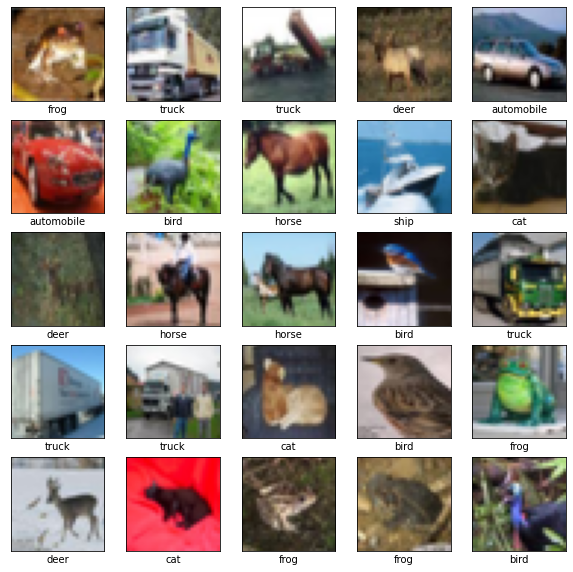

In [ ]:
import matplotlib.pyplot as plt
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
#building the input vector
X_train = X_train.reshape(X_train.shape[0], 32,32, 3) 

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 32,32, 3) 

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /=255
X_test /=255

In [ ]:
#onr hot encoding the labels
n_classes = 10
y_train.shape

(50000, 1)

In [ ]:
from keras.utils import np_utils #output labels to categorical values
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
#building the cnn model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()

#convolution layer
model.add(Conv2D(50, kernel_size = (3,3), strides = (1,1), padding ='same', activation = 'relu', input_shape = (32,32,3)))

#convolution layer
model.add(Conv2D(75, kernel_size = (3,3), strides = (1,1), padding ='same', activation = 'relu'))

#maxpool layer
model.add(MaxPool2D(pool_size = (2,2)))

#Droupout layer
model.add(Dropout(0.25))

#flatten layer
model.add(Flatten())

#fully connected layer
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation = 'relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(10, activation = 'softmax'))


In [ ]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
model.fit(X_train, y_train, batch_size = 128, epochs = 2, validation_data = (X_test, y_test))


Epoch 1/2
391/391 [==============================] - 312s 795ms/step - loss: 2.3031 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/2
391/391 [==============================] - 311s 796ms/step - loss: 2.3027 - accuracy: 0.0964 - val_loss: 2.3026 - val_accuracy: 0.1000


In [ ]:
#prediction
predict = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
predict[1]        

6

In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
#practical approach to  deep learning projects using cnn
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#preprocessing steps

img_width, img_height = 224,224

path1 = '/content/drive/MyDrive/Copy of v_data/train'
path2 = '/content/drive/MyDrive/Copy of v_data/test'

train_data_dir = path1
validation_data_dir = path2

train_samples = 400
validation_samples = 100

epochs = 2
batch_size = 16


In [ ]:
from keras import backend as K
if K.image_data_format() =='channels_first':
  input_shape = (3, img_width, img_height)
else:
  input_shape = (img_width, img_height, 3)  


In [ ]:
#prepocessing the data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode ='binary')




Found 400 images belonging to 2 classes.


In [ ]:
test_generator = test_gen.flow_from_directory(validation_data_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode ='binary')

Found 100 images belonging to 2 classes.


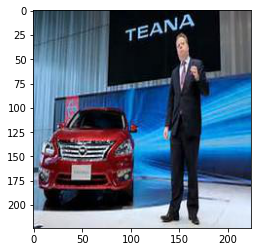

In [ ]:
#ploting the first image from the dataset
import matplotlib.pyplot as plt
a = plt.imread("/content/drive/MyDrive/v_data/train/cars/1.jpg")
plt.imshow(a)

In [ ]:
#Define the cnn model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (2,2), input_shape = input_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, (2,2), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (2,2), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
#compile the model
model.compile(loss = "binary_crossentropy")

In [ ]:
# Fit the model
model.fit_generator(train_generator, steps_per_epoch = train_samples//batch_size, epochs=epochs,validation_data = test_generator, validation_steps = validation_samples//batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
25/25 [==============================] - 20s 781ms/step - loss: 2.4214 - val_loss: 0.4468
Epoch 2/2
25/25 [==============================] - 20s 788ms/step - loss: 0.5153 - val_loss: 0.5069


In [ ]:
#saving the model
model.save("saved_model.h5")

In [ ]:
#load the model
from keras.models import load_model
model = load_model("saved_model.h5")

In [ ]:
predict = model.predict_classes(train_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
predict[0:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

In [ ]:
predict = model.predict_classes(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
predict[0:10]

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
a = (test_generator[0][0][0])

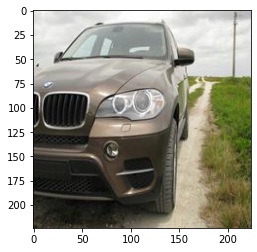

In [ ]:
plt.imshow(a)